# Report summarising the various aspects of the submisson and the model tunning process

## Prithvi Poddar (17191)

This report is also available in python notebook format in the same directory

## Structure of the directory

This assignment has been structured into various python classes, each purposed to carry out different kinds of tasks. Below, I'm providing a breif overwview of what each class does:

### 1. CsvModifier.py

For data preprocessing. This contains the classes to modify the csv files of the training and testing datasets for easy access to the data contained in them and to suit the structure of our inference models

### 2. polynomial.py

This contains the class to create a polynomial basis function for the design matrix

### 3. regressor.py

This has the classes for linear regression models and bayesian linear regression model

### 4. model.py

In this python file, I have written the code to test out the 2 models and various basis functions to determine which will perform the best. Hyper parameter tunning has also been performed in this code.
The codes in this file have also been executed  in this report below for visualization purposes.

### 5. inference.py & inference_bayesian.py

In these files, I've made the final prediction on the test data, after determining the parameters for both the linear regressor and bayesian linear regressor.

# Data preprocessing

The id values were basically dates in the format of mm/dd/yy.
So I had to take the values of the date, month and year separetly and use them as the training parameters.

Upon inspecting the data, I noticed that all the dates were 1 for both the training and test set. So I dropped the dates and only considered the month and the year values.

I did not consider scaling the features as they were in reasonable deviations from each other.
I made separate classes that create a new csv file which has the data in desirable format.

# Testing the models and conducting hyperparameter tunning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from CsvModifier import (TrainCsvModifier, TestCsvModifier)
from regressors import LinearRegression, BayesianLinearRegression
from polynomial import PolynomialFeature
%matplotlib inline

In [2]:
path_train= 'train.csv'
new_train = TrainCsvModifier(path_train)
new_train.create_new_csv()

path_predict = 'test.csv'
new_predict = TestCsvModifier(path_predict)
new_predict.create_new_csv()

In [3]:
data = pd.read_csv('train_new.csv')

X = data.iloc[:,:2].to_numpy()
y = data.iloc[:,-1:].to_numpy()
y = np.reshape(y, (110))

First we look at the linear regressor with a linear basis function i.e. just the input parameters with no powers

We use a 10:1 train-test set ratio 

In [4]:
n = 100
X_train = X[:n,:]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
y_train = y[:n]
X_test = X[n:,:]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]
y_test = y[n:]

In [5]:
regressor = LinearRegression()
train_error, test_error = regressor.fit(X_train,y_train,X_test,y_test)

Linear Regression errors-
Training set error: 85.17021930907777
Test set error: 86.90627952371993


Here we see that the test set error is very high. Thus this is not a suitable model.

Next we try the linear regressor with a polynomial basis function and we do hyper parameter tunning on the degree of the polynomial to choose

Linear Regression errors-
Training set error: 85.17021930907777
Test set error: 86.90627952371993
Linear Regression errors-
Training set error: 27.84850415991151
Test set error: 27.740813851489627
Linear Regression errors-
Training set error: 14.55145220107541
Test set error: 11.228441393679644
Linear Regression errors-
Training set error: 7.974130951437643
Test set error: 4.364937085428666
Linear Regression errors-
Training set error: 6.4434594481992065
Test set error: 2.829202977971513
Linear Regression errors-
Training set error: 6.193884820342053
Test set error: 2.5755389784353557
Linear Regression errors-
Training set error: 6.157558429297052
Test set error: 2.4919112783508317
Linear Regression errors-
Training set error: 6.130918591044329
Test set error: 2.687982301344684
Linear Regression errors-
Training set error: 6.112304807968683
Test set error: 3.1193628105797027
Linear Regression errors-
Training set error: 6.086009743029291
Test set error: 2.900467310351304
Linear Regress

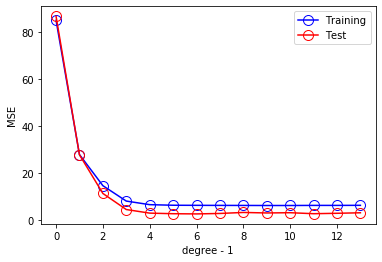

In [11]:
training_errors = []
test_errors = []
n = 100
X_train = X[:n,:]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
y_train = y[:n]
X_test = X[n:,:] 
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]
y_test = y[n:]

regressor = LinearRegression()

for i in range(1,15):
    feature = PolynomialFeature(i)
    X_train = feature.transform(X_train)
    X_test = feature.transform(X_test)
    error1, error2 = regressor.fit(X_train,y_train,X_test,y_test)
    training_errors.append(error1)
    test_errors.append(error2)
    
plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree - 1")
plt.ylabel("MSE")
plt.show()

We can see that the polynomial basis performs significantly better. From the error graph, we can see that degree 5 is a reasonable choice.

Next we check the bayesian linear regressor with polynomial basis function while performing hyper parameter tunning on the degree of the polynomial

Bayesian Linear Regression errors-
Training set error: 85.33271310844319
Test set error: 83.5450865774803
Bayesian Linear Regression errors-
Training set error: 27.95576098359475
Test set error: 27.87011036988999
Bayesian Linear Regression errors-
Training set error: 14.612695977136639
Test set error: 11.60292547089241
Bayesian Linear Regression errors-
Training set error: 8.280816515063648
Test set error: 4.234331982349376
Bayesian Linear Regression errors-
Training set error: 6.603788920975712
Test set error: 2.907029215707048
Bayesian Linear Regression errors-
Training set error: 6.303562793368843
Test set error: 2.7998644377490587
Bayesian Linear Regression errors-
Training set error: 179.50032667536914
Test set error: 235.541012201334


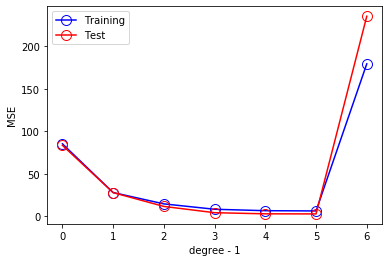

In [14]:
training_errors = []
test_errors = []
n = 100
X_train = X[:n,:]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
y_train = y[:n]
X_test = X[n:,:] 
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]
y_test = y[n:]

regressor = BayesianLinearRegression(1,10)

for i in range(1,8):
    feature = PolynomialFeature(i)
    X_train = feature.transform(X_train)
    X_test = feature.transform(X_test)
    error1, error2 = regressor.fit(X_train,y_train,X_test,y_test)
    training_errors.append(error1)
    test_errors.append(error2)
    
plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree - 1")
plt.ylabel("MSE")
plt.show()

Thus we can see that degree 6 is the best chooice as at degree 7, the errors blow up

Next we run hyper parameter tunning on the mean of the bayesian regressor

Bayesian Linear Regression errors-
Training set error: 6.362760219572716
Test set error: 2.384752251188859
Bayesian Linear Regression errors-
Training set error: 273.4510379153951
Test set error: 340.58836549845523
Bayesian Linear Regression errors-
Training set error: 114.99569429074617
Test set error: 77.19670132248027
Bayesian Linear Regression errors-
Training set error: 33.77944552714239
Test set error: 20.179811298276142
Bayesian Linear Regression errors-
Training set error: 248.20300046951292
Test set error: 343.8576789517111
Bayesian Linear Regression errors-
Training set error: 19.954416930581473
Test set error: 12.15130620009812
Bayesian Linear Regression errors-
Training set error: 33.05638700422219
Test set error: 23.67843722393067
Bayesian Linear Regression errors-
Training set error: 626.1674195439583
Test set error: 993.7817918028475
Bayesian Linear Regression errors-
Training set error: 429.5653080533668
Test set error: 405.4001430407056
Bayesian Linear Regression error

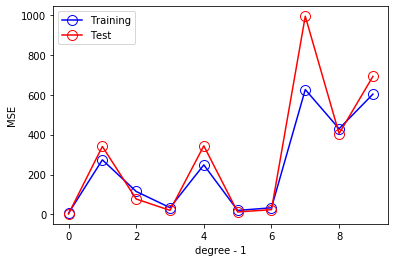

In [16]:
training_errors = []
test_errors = []
n = 100
X_train = X[:n,:]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
y_train = y[:n]
X_test = X[n:,:] 
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]
y_test = y[n:]



for i in range(0,10):
    regressor = BayesianLinearRegression(i,10)
    feature = PolynomialFeature(6)
    X_train = feature.transform(X_train)
    X_test = feature.transform(X_test)
    error1, error2 = regressor.fit(X_train,y_train,X_test,y_test)
    training_errors.append(error1)
    test_errors.append(error2)
    
plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree - 1")
plt.ylabel("MSE")
plt.show()

Thus it turns out that we should go with mean = 0

# Final predictions

## 1. Linear regressor with polynomial basis of degree 5

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from CsvModifier import (TrainCsvModifier, TestCsvModifier)
from regressors import LinearRegression
from polynomial import PolynomialFeature

path_train= 'train.csv'
new_train = TrainCsvModifier(path_train)
new_train.create_new_csv()

path_predict = 'test.csv'
new_predict = TestCsvModifier(path_predict)
new_predict.create_new_csv()

data = pd.read_csv('train_new.csv')

X = data.iloc[:,:2].to_numpy()
y = data.iloc[:,-1:].to_numpy()
y = np.reshape(y, (110))

n = 100
X_train = X[:n,:]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]

y_train = y[:n]

X_test = X[n:,:] 
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]

y_test = y[n:]

feature = PolynomialFeature(5)
X_train = feature.transform(X_train)
X_test = feature.transform(X_test)

regressor = LinearRegression()
error1, error2 = regressor.fit(X_train,y_train,X_test,y_test)

pred = pd.read_csv('test_new.csv')
X_pred = pred.iloc[:,:].to_numpy()
X_pred = np.c_[np.ones(len(X_pred),dtype='int64'),X_pred]
X_pred = feature.transform(X_pred)
prediction = regressor.predict(X_pred)

result = pd.read_csv('test.csv')
ids = result['id']
final = {'id':ids, 'value':prediction}
df = pd.DataFrame(final)
df.to_csv (r'Prithvi_17191_prediction.csv', index = False, header=True)

Linear Regression errors-
Training set error: 6.443459448199203
Test set error: 2.82920297920196


## 2. Bayesian Regressor with polynomial basis of degree 6 and mean = 0 and variance = 10

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from CsvModifier import (TrainCsvModifier, TestCsvModifier)
from regressors import BayesianLinearRegression
from polynomial import PolynomialFeature

path_train= 'train.csv'
new_train = TrainCsvModifier(path_train)
new_train.create_new_csv()

path_predict = 'test.csv'
new_predict = TestCsvModifier(path_predict)
new_predict.create_new_csv()

data = pd.read_csv('train_new.csv')

X = data.iloc[:,:2].to_numpy()
y = data.iloc[:,-1:].to_numpy()
y = np.reshape(y, (110))

n = 100
X_train = X[:n,:]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]

y_train = y[:n]

X_test = X[n:,:] 
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]

y_test = y[n:]

feature = PolynomialFeature(6)
X_train = feature.transform(X_train)
X_test = feature.transform(X_test)

regressor = BayesianLinearRegression(0,10)
error1, error2 = regressor.fit(X_train,y_train,X_test,y_test)

pred = pd.read_csv('test_new.csv')
X_pred = pred.iloc[:,:].to_numpy()
X_pred = np.c_[np.ones(len(X_pred),dtype='int64'),X_pred]
X_pred = feature.transform(X_pred)
prediction = regressor.predict(X_pred)

result = pd.read_csv('test.csv')
ids = result['id']
final = {'id':ids, 'value':prediction}
df = pd.DataFrame(final)
df.to_csv (r'Prithvi_17191_prediction3.csv', index = False, header=True)

Bayesian Linear Regression errors-
Training set error: 6.210592000475085
Test set error: 2.9641013656511768


## The final csv files with the predictions get saved in the working directory